# 数据

In [1]:
# 导入 TensorFlow
import tensorflow as tf
# 即显模式
tf.enable_eager_execution()
import numpy as np

In [2]:
# 生成数据
def taxi(x):
    init = 14.
    unit = 2.5
    if x<3:
        return tf.constant(init)
    else:
        return init + unit*(x-3)
    
n_example = 100
X = tf.random_uniform([n_example], 0, 6)
Y = np.array([taxi(x) for x in X])

# 训练集
train_x = X[:80].numpy().reshape(-1,1)
train_y = Y[:80].reshape(-1,1)

# 测试集
test_x = X[80:].numpy().reshape(-1,1)
test_y = Y[80:].reshape(-1,1)

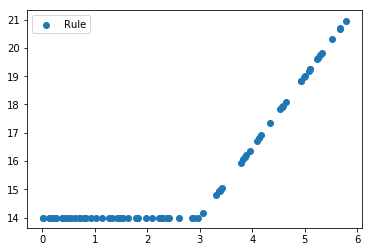

In [4]:
# 显示训练集
import matplotlib.pyplot as plt
#plt.plot(train_x, train_y, color='green')
plt.scatter(train_x, train_y)
plt.legend(['Rule','Data'])

# 模型

In [5]:
import tensorflow.contrib.eager as tfe
# 定义模型
# 初始化方法
def inits(shape):
    return tf.random_uniform(shape,
            minval=-np.sqrt(5) * np.sqrt(1.0 / shape[0]),
            maxval=np.sqrt(5) * np.sqrt(1.0 / shape[0]))
class Model(object):
    def __init__(self):
        # 参数
        # 初始化：随便给 参数 W 和 b 两个值
        self.W = tfe.Variable(inits([1,2]))
        self.b = tfe.Variable(inits([2]))
        self.W1 = tfe.Variable(inits([2,1]))
        self.b1 = tfe.Variable(inits([1]))
    
    def __call__(self, x):
        # 正向传递
        # 如何利用 参数 W 和 b 运算
        y = tf.nn.relu(tf.matmul(x, self.W)  + self.b)
        y = tf.matmul(y, self.W1)+ self.b1
        return y
# 实例模型
model = Model()

# 训练

Final Test Loss: 7.1031535e-11
[[13.999992]
 [16.500004]
 [31.499918]
 [43.999847]]


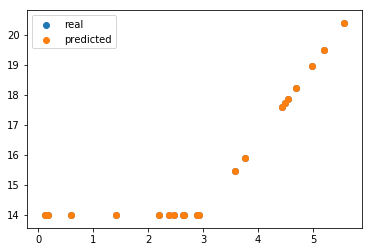

In [6]:
# 误差
def loss(prediction, label):
    loss = tf.reduce_mean(tf.square(prediction - label))
    return loss

# 反向传递
def train(model, x, y, learning_rate, batch_size, epoch):
    # 次数
    for e in range(epoch):
        # 批量
        for b in range(0,len(x),batch_size):
            # 梯度
            with tf.GradientTape() as tape:
                loss_value = loss(model(x[b:b+batch_size]), y[b:b+batch_size])
                dW, db, dW1, db1 = tape.gradient(loss_value, [model.W, model.b, model.W1, model.b1])
                #print(dW, db)
            # 更新参数
            model.W.assign_sub(dW * learning_rate)
            model.b.assign_sub(db * learning_rate)
            model.W1.assign_sub(dW1 * learning_rate)
            model.b1.assign_sub(db1 * learning_rate)
        # 显示
        #print("Epoch: %03d | Loss: %.3f | W: %s | b: %s" %(e, loss(model(x), y), model.W.numpy(), model.b.numpy()))

# 训练
train(model, train_x, train_y, learning_rate = 0.001, batch_size = 1, epoch = 3000)

# 评估
test_p = model(test_x)
print("Final Test Loss: %s" %loss(test_p, test_y).numpy())

# 可视化
plt.scatter(test_x,test_y)
plt.scatter(test_x,test_p)
plt.legend(['real','predicted'])


# 预测
test_p = model(np.array([1.,4.,10.,15.,]).reshape(-1,1).astype('float32'))
print(test_p.numpy())